### 2.非线性支持向量机与核函数

    当分类问题是非线性的时候，可以使用非线性支持向量机，其主要特点是利用核技巧。
    
    
#### 2.1核技巧

##### 2.1.1核函数的使用背景

![title](images/033.png)
![title](images/034.png)
非线性问题的解决方法：通过非线性变换，将非线性问题变为线性问题

**举例说明：**
假设二维平面x-y上存在若干点，其中点集A服从{x,y|x^2+y^2=1}，点集B服从{x,y|x^2+y^2=9}，那么这些点在二维平面上的分布是这样的： 
![title](images/035.png)


蓝色的是点集A，红色的是点集B，他们在xy平面上并不能线性可分，即用一条直线分割（ 虽然肉眼是可以识别的） 。采用映射(x,y)->(x,y,x^2+y^2)后，在三维空间的点的分布为： 

![title](images/036.png)
![title](images/037.png)

**用线性分类方法求解非线性问题分为两步：**

+ 使用一个变换将原空间的数据映射到新空间 

+ 在新空间用线性分类学习方法从训练数据中学习分类模型

##### 2.1.2 核函数的定义
    
  设$\chi$为输入空间，又设$H$为特征空间(希尔伯特空间)，如果存在一个从$\chi$到$H$的映射：$$\Phi(x)={\chi}->H$$
    使得所有的$x,z\in{\chi}$，函数$K(x,z)=\Phi(x)*\Phi(z)$,K称为核函数，$\Phi$为映射函数。
    
![title](images/038.png)
    
##### 2.1.3核技巧在支持向量机中的应用 
![title](images/040.png)
![title](images/039.png)

##### 2.1.4常见的核函数
![title](images/041.png)

![title](images/042.png)

利用核技巧可以将线性分类的学习方法应用到非线性分类问题中去，将线性支持向量机扩展到非线性支持向量机，只需将线性支持向量机对偶形式的内积换成核函数即可。

从非线性分类训练集，通过核函数与软间隔最大化，或凸二次规划(7.95)~(7.97)学习得到的分类决策函数：

![title](images/043.png)

称为非线性支持向量，$K(x,z)$是正定核函数。

非线性支持向量机学习算法：

![title](images/044.png)

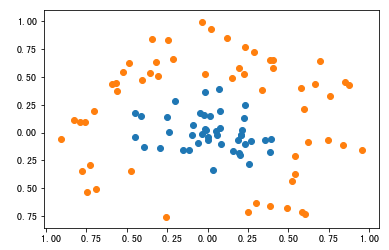

In [2]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

def loadDataSet(fileName):
    """

    :param fileName:
    :return: dataMat, labelMat
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():  # 逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])  # 添加数据
        labelMat.append(float(lineArr[2]))  # 添加标签
    return dataMat, labelMat


def showDataSet(dataMat,labelMat):
    """
    数据可视化

    :param dataMat: 数据矩阵
    :param labelMat: 数据标签
    :return: 无
    """
    #正样本
    data_plus=[]
    #负样本
    data_minus=[]

    for i in range(len(dataMat)):
        if labelMat[i]>0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np=np.array(data_plus)
    data_minus_np=np.array(data_minus)
    #正样本散点图
    plt.scatter(np.transpose(data_plus_np)[0],np.transpose(data_plus_np)[1])
    #负样本散点图
    plt.scatter(np.transpose(data_minus_np)[0],np.transpose(data_minus_np)[1])

    plt.show()

if __name__=='__main__':
    dataArr,labelArr=loadDataSet('testSetRBF.txt')
    showDataSet(dataArr,labelArr)

### 序列最小最优化算法（SMO算法）

支持向量机问题可以转化为求解凸二次规划问题，这样的问题具有全局最优解，并且有许多算法可以用于这个问题的求解，但是当训练样本容量很大时，这些算法往往变得非常低效，以至于无法使用。

1996年，John Platt发布了一个称为SMO的强大算法，用于训练SVM。SM表示序列最小化(Sequential Minimal Optimizaion)。Platt的SMO算法是将大优化问题分解为多个小优化问题来求解的。这些小优化问题往往很容易求解，并且对它们进行顺序求解的结果与将它们作为整体来求解的结果完全一致的。在结果完全相同的同时，SMO算法的求解时间短很多。

SMO算法的目标是求出一系列alpha和b，一旦求出了这些alpha，就很容易计算出权重向量w并得到分隔超平面。

SMO算法的工作原理是：每次循环中选择两个alpha进行优化处理。一旦找到了一对合适的alpha，那么就增大其中一个同时减小另一个。这里所谓的”合适”就是指两个alpha必须符合以下两个条件，条件之一就是两个alpha必须要在间隔边界之外，而且第二个条件则是这两个alpha还没有进进行过区间化处理或者不在边界上。 
##### 两个变量二次规划的求解方法

![title](images/046.png)
![title](images/047.png)
![title](images/048.png)
![title](images/049.png)

##### 变量的选择方法
![title](images/050.png)
![title](images/051.png)
![title](images/052.png)

##### SMO算法步骤

![title](images/053.png)
![title](images/054.png)

+ 1.步骤一：计算误差：

![title](images/055.png)

+ 2.步骤二：计算上下界L和H： 

![title](images/056.png)

+ 3.步骤三：计算$\eta$

![title](images/057.png)

+ 4.步骤四：更新${\alpha}_j$
 
![title](images/058.png) 

+ 5.步骤五：根据取值范围修剪${\alpha}_j$

![title](images/059.png)

+ 6.步骤六：更新${\alpha}_i$

![title](images/060.png)

+ 7.步骤七：更新$b_1$,$b_2$

![title](images/061.png)

+ 8.步骤八：根据$b_1$,$b_2$更新$b$

![title](images/062.png)

 
#### 完整版SMO算法

完整版Platt SMO算法是通过一个外循环来选择违反KKT条件的一个乘子，并且其选择过程会在这两种方式之间进行交替：

+ 在所有数据集上进行单遍扫描

+ 在非边界α中实现单遍扫描

非边界α指的就是那些不等于边界0或C的α值，并且跳过那些已知的不会改变的α值。所以我们要先建立这些α的列表，用于才能出α的更新状态。

在选择第一个α值后，算法会通过”启发选择方式”选择第二个α值。






## 使用sklearn构建SVM分类器

sklearn.svm模块提供了很多模型，其中svm.SVC是基于libsvm实现的。

![title](images/063.png)

***class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)***

**参数说明如下：**

+ C：惩罚项，float类型，可选参数，默认为1.0，C越大，即对分错样本的惩罚程度越大，因此在训练样本中准确率越高，但是泛化能力降低，也就是对测试数据的分类准确率降低。相反，减小C的话，容许训练样本中有一些误分类错误样本，泛化能力强。对于训练样本带有噪声的情况，一般采用后者，把训练样本集中错误分类的样本作为噪声。

+ kernel：核函数类型，str类型，默认为’rbf’。可选参数为： 
    1.’linear’：线性核函数
    2.‘poly’：多项式核函数
    3.‘rbf’：径像核函数/高斯核
    4.‘sigmod’：sigmod核函数
    5.‘precomputed’：核矩阵
    6.precomputed表示自己提前计算好核函数矩阵，这时候算法内部就不再用核函数去计算核矩阵，而是直接用你给的核矩阵，核矩阵需要为n*n的。
    
+ degree：多项式核函数的阶数，int类型，可选参数，默认为3。这个参数只对多项式核函数有用，是指多项式核函数的阶数n，如果给的核函数参数是其他核函数，则会自动忽略该参数

+ gamma：核函数系数，float类型，可选参数，默认为auto。只对’rbf’ ,’poly’ ,’sigmod’有效。如果gamma为auto，代表其值为样本特征数的倒数，即1/n_features。

+ coef0：核函数中的独立项，float类型，可选参数，默认为0.0。只有对’poly’ 和,’sigmod’核函数有用，是指其中的参数c。

+ probability：是否启用概率估计，bool类型，可选参数，默认为False，这必须在调用fit()之前启用，并且会fit()方法速度变慢。

+ shrinking：是否采用启发式收缩方式，bool类型，可选参数，默认为True。

+ tol：svm停止训练的误差精度，float类型，可选参数，默认为1e^-3。

+ cache_size：内存大小，float类型，可选参数，默认为200。指定训练所需要的内存，以MB为单位，默认为200MB。

+ class_weight：类别权重，dict类型或str类型，可选参数，默认为None。给每个类别分别设置不同的惩罚参数C，如果没有给，则会给所有类别都给C=1，即前面参数指出的参数C。如果给定参数’balance’，则使用y的值自动调整与输入数据中的类频率成反比的权重。

+ verbose：是否启用详细输出，bool类型，默认为False，此设置利用libsvm中的每个进程运行时设置，如果启用，可能无法在多线程上下文中正常工作。一般情况都设为False，不用管它。

+ max_iter：最大迭代次数，int类型，默认为-1，表示不限制。

+ decision_function_shape：决策函数类型，可选参数’ovo’和’ovr’，默认为’ovr’。’ovo’表示one vs one，’ovr’表示one vs rest。

+ random_state：数据洗牌时的种子值，int类型，可选参数，默认为None。伪随机数发生器的种子,在混洗数据时用于概率估计。







In [1]:
import numpy as np
import operator
from os import listdir
from sklearn.svm import SVC


def img2Vector(filename):
    """
    将32*32的二进制图像转换为1*1024的向量
    :param filename: 文件名
    :return: 返回的二进制图像的1*1024向量
    """
    # 创建1*1024零向量
    returnVect = np.zeros((1, 1024))
    # 打开文件
    fr = open(filename)
    # 按行读取
    for i in range(32):
        # 读取一行数据
        lineStr = fr.readline()
        # 每一行的前32个元素依次添加到returnVect中
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    # 返回转换后的1*1024向量
    return returnVect


def handwritingClassTest():
    """
    手写数字分类测试
    :return: 无
    """
    # 测试集的Labels
    hwLabels = []
    # 返回trainingDigits目录下的文件名
    trainingFileList = listdir('trainingDigits')
    # 返回文件夹下文件的个数
    m = len(trainingFileList)
    # 初始化训练的Mat矩阵，测试集
    trainingMat = np.zeros((m, 1024))
    # 从文件名中解析出训练的类别
    for i in range(m):
        # 获得文件的名字
        fileNameStr = trainingFileList[i]
        # 获得分类的数字
        classNumber = int(fileNameStr.split('_')[0])
        # 将获得的类别添加到hwlabels中
        hwLabels.append(classNumber)
        # 将每个文件的1*1024数据存储到trainingMat矩阵中
        trainingMat[i, :] = img2Vector('E:/python/machine learning in action/My Code/chap 06/trainingDigits/%s' % (fileNameStr))

    clf = SVC(C=200, kernel='rbf')
    clf.fit(trainingMat, hwLabels)
    # 返回testDigits目录下的文件列表
    testFileList = listdir('testDigits')
    # 错误检测技术
    errorCount = 0.0
    # 测试数据的数量
    mTest = len(testFileList)
    # 从文件中解析出测试集的类别并进行分类测试
    for i in range(mTest):
        fileNameStr = testFileList[i]
        classNumber = int(fileNameStr.split('_')[0])
        # 获得测试集的1*1024向量，用于训练
        vectorUnderTest = img2Vector(
            'E:/python/machine learning in action/My Code/chap 06/testDigits/%s' % (fileNameStr))
        # 获得预测结果
        classfierResult = clf.predict(vectorUnderTest)
        print("分类返回结果为 %d \t 真实结果为%d " % (classfierResult, classNumber))

        if (classfierResult != classNumber):
            errorCount += 1.0
    print("总共错了%d个数据 \n 错误率为%f%%" % (errorCount, errorCount / mTest * 100))


if __name__ == '__main__':
    handwritingClassTest()

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'E:/python/machine learning in action/My Code/chap 06/trainingDigits'

### 优点：
可用于线性/非线性分类，也可以用于回归，泛化错误率低，也就是说具有良好的学习能力，且学到的结果具有很好的推广性。

可以解决小样本情况下的机器学习问题，可以解决高维问题，可以避免神经网络结构选择和局部极小点问题。

SVM是最好的现成的分类器，现成是指不加修改可直接使用。并且能够得到较低的错误率，SVM可以对训练集之外的数据点做很好的分类决策。

### 缺点

对参数调节和和函数的选择敏感。

